# To import data using API


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


# Unzipping the file

In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Main code

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

### generators to import data

In [9]:
train_ds=keras.utils.image_dataset_from_directory(
    directory= "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory= "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#normalize 0 se 256 tk h usko 0 se 1 tk krna h
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

# Create CNN model

In [11]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(256,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,819,393 (26.01 MB)

 Trainable params: 6,819,393 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 77ms/step - accuracy: 0.5478 - loss: 0.6918 - val_accuracy: 0.5888 - val_loss: 0.6706
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 75ms/step - accuracy: 0.6867 - loss: 0.5853 - val_accuracy: 0.7520 - val_loss: 0.5049
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.7909 - loss: 0.4416 - val_accuracy: 0.8260 - val_loss: 0.3891
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.8403 - loss: 0.3574 - val_accuracy: 0.8414 - val_loss: 0.3693
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.8855 - loss: 0.2685 - val_accuracy: 0.8350 - val_loss: 0.4142
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.9224 - loss: 0.1899 - val_accuracy: 0.8362 - val_loss: 0.5177
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9508 - loss: 0.1198 - val_accuracy: 0.8204 - val_loss: 0.6321
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9648 - loss: 0.0901 - 

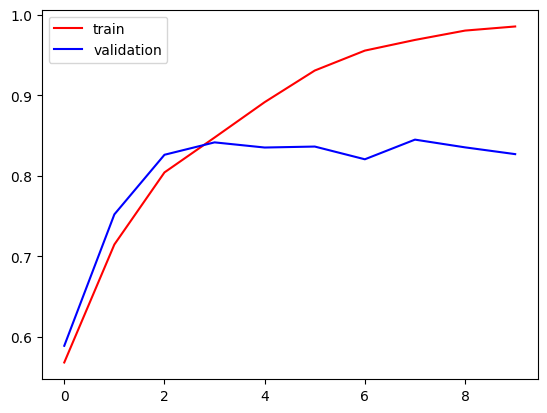

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
history.history['accuracy']


[0.5680999755859375,
 0.7146000266075134,
 0.804099977016449,
 0.8474000096321106,
 0.8913499712944031,
 0.9305999875068665,
 0.9553499817848206,
 0.9685999751091003,
 0.9801999926567078,
 0.9853000044822693]

In [18]:
print("Validation Accuracy per Epoch:", history.history['val_accuracy'])


Validation Accuracy per Epoch: [0.5888000130653381, 0.7519999742507935, 0.8259999752044678, 0.8414000272750854, 0.8349999785423279, 0.8361999988555908, 0.8203999996185303, 0.8447999954223633, 0.8352000117301941, 0.8267999887466431]


In [21]:
print("Final Training Accuracy:", (history.history['accuracy'][-1])*100)


Final Training Accuracy: 98.53000044822693


In [22]:
import cv2

In [30]:
test_img=cv2.imread("/content/dog.jpg")


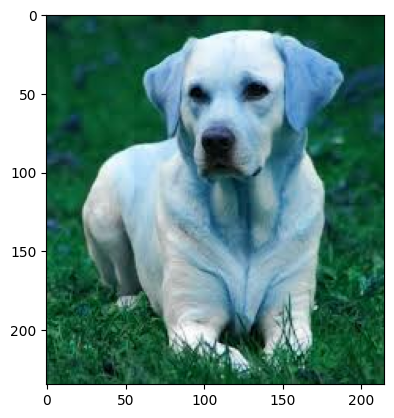

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(235, 215, 3)

In [33]:
test_img=cv2.resize(test_img,(256,256))

In [34]:
test_input=test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)#1 means dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[1.]], dtype=float32)

In [37]:
model.save("dog_cat_model.h5")
